In [76]:
import numpy as np
import pandas as pd
import sympy as sp
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic  as logic
import schemdraw.parsing

# Gates and Logical Expressions

This notebook will cover logic gates and logical expressions, as well as how to simplify expressions using boolean algebra and Karnaugh Maps.

When writing logical expressions it is sometimes necessary to express the complement (inversion) of a value.  Conventionally this is done with either a prime ( $A'$ ) or an overbar  ( $\overline{A}$ ).  In this notebook I will be using the prime notation, primarily to make it easier to type.

## Logic Gates

In [37]:
# Declaring symbols for later
A ,B, C, D, X = sp.symbols('A B C D X')

In [31]:
# Function for quickly generating truth tables
def truth_table_df(variables):
    def combinations(n):
        if n < 1:
            return [[]]
        subtable = combinations(n-1)
        table = [ row + [v] for row in subtable for v in [False,True] ]
        return table
    n = len(variables)
    df = pd.DataFrame(combinations(n), columns=variables)
    return df


### NOT Gate

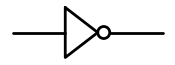

In [4]:
# Symbol for NOT Gate
with schemdraw.Drawing() as d:
    logic.Not()

NOT Gates (Inverters) change one logic level to the opposite level.  
The logical expression for a NOT Gate is:
$$ X = A' $$

In [42]:
NOT = sp.Eq(X,~A)
NOT

Eq(X, ~A)

In [32]:
#Truth table
inputs = ['A']
tt = truth_table_df(inputs)
tt['X'] = ~tt['A'] # In pandas, ~ is the NOT operator
tt

,A,X
0,False,True
1,True,False


### AND Gate

The AND Gate takes multiple outputs and only activates when **all** inputs are active.
Logically it is similar to multiplication.
$$ X = AB $$
Anything multiplied by 0 is 0, so X only equals 1 when all factors are 1. (Only numbers possible are 0 and 1)

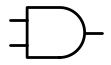

In [51]:
# Symbol for AND Gate
with schemdraw.Drawing() as d:
    logic.And()

In [66]:
AND = sp.Eq(X, A & B)
AND

Eq(X, A & B)

In [55]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = tt['A']*tt['B']
tt

,A,B,X
0,False,False,False
1,False,True,False
2,True,False,False
3,True,True,True


### OR Gate

The OR Gate takes multiple outputs and activates when **any** inputs are active.
Logically it is similar to addition. (However, in boolean mathematics 1+1 = 1)
$$ X = A + B $$

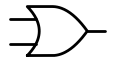

In [56]:
# Symbol for OR Gate
with schemdraw.Drawing() as d:
    logic.Or()

In [59]:
OR = sp.Eq(X, A|B)
OR

Eq(X, A | B)

In [60]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = tt['A']+tt['B']
tt

,A,B,X
0,False,False,False
1,False,True,True
2,True,False,True
3,True,True,True


### NAND Gate

The NAND gate is similar in function to an AND gate and a NOT gate in sequence.  This means that NAND Gate will be active *unless* all inputs are active.  
Logically it is expressed as:
$$ X = \overline{AB} $$

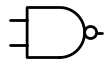

In [62]:
# Symbol for NAND Gate
with schemdraw.Drawing() as d:
    logic.Nand()

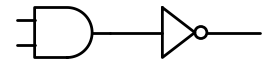

In [63]:
# Equivalent with AND and NOT
with schemdraw.Drawing() as d:
    logic.And()
    logic.Not()

In [64]:
NAND = sp.Eq(X, ~(A&B))
NAND

Eq(X, ~(A & B))

In [67]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = ~(tt['A']*tt['B'])
tt

,A,B,X
0,False,False,True
1,False,True,True
2,True,False,True
3,True,True,False


### NOR Gate
A NOR Gate is an OR Gate with a NOT Gate attached. It is only active when *none* of the inputs are active
$$ X = \overline{A+B} $$

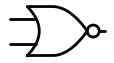

In [68]:
# Symbol for NOR Gate
with schemdraw.Drawing() as d:
    logic.Nor()

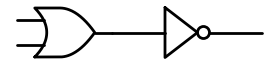

In [69]:
# Equivalent with OR and NOT
with schemdraw.Drawing() as d:
    logic.Or()
    logic.Not()

In [70]:
NOR = sp.Eq(X, ~(A|B))
NOR

Eq(X, ~(A | B))

In [71]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = ~(tt['A']+tt['B'])
tt

,A,B,X
0,False,False,True
1,False,True,False
2,True,False,False
3,True,True,False


### Exclusive-OR and Exclusive-NOR Gates

#### XOR

These two gates are really a combination of other gates, but because they are commonly encountered it is useful to have them in our library of symbols.  
This gate is active only when the inputs are different.
$$ X = A \oplus B $$
$$ X = AB'+A'B $$

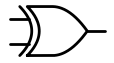

In [72]:
# Symbol for XOR Gate
with schemdraw.Drawing() as d:
    logic.Xor()

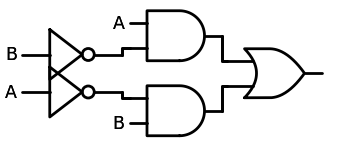

In [75]:
# As a combination of gates
with schemdraw.Drawing() as d:
    schemdraw.parsing.logic_parser.logicparse("(A and not B) or (not A and B)")

In [79]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = ~(tt.sum(axis=1) % 2 == 0)
tt

,A,B,X
0,False,False,False
1,False,True,True
2,True,False,True
3,True,True,False


#### XNOR

This is an inverted XOR Gate.  It is active when all of the inputs are the same.
$$ X = \overline{A \oplus B} $$

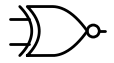

In [80]:
# Symbol for XNOR Gate
with schemdraw.Drawing() as d:
    logic.Xnor()

In [87]:
#Truth table
inputs = ['A','B']
tt = truth_table_df(inputs)
tt['X'] = (tt.sum(axis=1) % 2 == 0)
tt

,A,B,X
0,False,False,True
1,False,True,False
2,True,False,False
3,True,True,True


#### Exclusivity with more than 2 inputs
When using more than 2 inputs, the behavior of these gates is a little different.  Rather than testing the equality of the inputs, we are testing if an odd number of inputs are active.

In [90]:
#Truth table
inputs = ['A','B','C','D']
tt = truth_table_df(inputs)
tt['XOR'] = ~(tt[inputs].sum(axis=1) % 2 == 0)
tt['XNOR'] = (tt[inputs].sum(axis=1) % 2 == 0)
tt

,A,B,C,D,XOR,XNOR
0,False,False,False,False,False,True
1,False,False,False,True,True,False
2,False,False,True,False,True,False
3,False,False,True,True,False,True
4,False,True,False,False,True,False
5,False,True,False,True,False,True
6,False,True,True,False,False,True
7,False,True,True,True,True,False
8,True,False,False,False,True,False
9,True,False,False,True,False,True
